In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
#df = spark.read.csv("/FileStore/tables/dados_aeronaves.csv", header=True, sep=';')
df = spark.read.csv("/FileStore/tables/dados_aeronaves_mod-2.csv", header=True, sep=';')
 
df = df.toPandas()





In [0]:
df.head()

,MARCA,PROPRIETARIO,OUTROS_PROPRIETARIOS,SG_UF,CPF_CNPJ,NM_OPERADOR,OUTROS_OPERADORES,UF_OPERADOR,CPF_CGC,NR_CERT_MATRICULA,...,DT_VALIDADE_CA,DT_CANC,DS_MOTIVO_CANC,CD_INTERDICAO,CD_MARCA_NAC1,CD_MARCA_NAC2,CD_MARCA_NAC3,CD_MARCA_ESTRANGEIRA,DS_GRAVAME,DT_MATRICULA
0,PPAAM,GOLDGRAIN AGROCEREAIS LTDA,CASSIANO CORAZZA;JAKELINE ALBERTON ARDENGHY;MA...,RS,12.626.145/0001-81,GOLDGRAIN AGROCEREAIS LTDA,CASSIANO CORAZZA;JAKELINE ALBERTON ARDENGHY;MA...,RS,12.626.145/0001-81,18180,...,27052023,null,null,N,null,null,null,null,NENHUM GRAVAME REGISTRADO,22/03/2011 00:00
1,PPAGP,AUSTEN MÁQUINAS E EQUIPAMENTOS LTDA,null,PR,09.106.524/0001-36,AEROSUL LINHAS AÉREAS LTDA,null,PR,27.315.694/0001-02,20205,...,16022026,null,null,N,null,null,null,null,CESSÃO DE USO,14/10/2011 00:00
2,PPAJN,SKYJET BRASIL SERV.AEREOS SA,null,RJ,86.977.642/0001-60,null,null,null,null,0,...,300999,2010-01-28 00:00:00.000,Nº MATRICULA SEM PADRAO,M4,null,null,null,null,RESERVADAS AS MARCAS,None
3,PPAMP,MARIA ELEUZA SOUSA BUENO,null,PA,000.XXX.XXX-00,MARIA ELEUZA SOUSA BUENO,null,PA,000.XXX.XXX-00,5824,...,251097,2022-05-12 00:00:00.000,PERECIMENTO,M,null,null,null,null,MATRÍCULA CANCELADA,23/03/2012 00:00
4,PPAPC,URANO IMPORTADORA E EXPORTADORA DE ELETRÔNICOS...,null,PR,13.055.783/0001-52,URANO IMPORTADORA E EXPORTADORA DE ELETRÔNICOS...,null,PR,13.055.783/0001-52,3213,...,20122020,null,null,C8,null,null,null,null,NENHUM GRAVAME REGISTRADO,07/02/2013 00:00


In [0]:
#Este código trata casos de null na coluna SG_UF que indica a Unidade da Federação onde a aeronave está cadastrada, porém, aeronaves cadastradas fora do Brasil não possuel UF. Por isso se fez necessária a correção.

novo_nome = df["SG_UF"] == "null"
df.loc[novo_nome, "SG_UF"] = "EXT"


- Consideramos que cada registro da tabela é uma aeronave, independente da situaçao da matricula ou se está operacional(em condições de voo).
- Futuramente seria possivel realizar uma melhor análise para entender cada código e justificativa da ANAC para cada linha da tabela.

In [0]:
#Este código mostra a quantidade de aeronaves registradas por UF e Internacionais, ordenadas de forma decrescente
teste=(
    df
    .query('SG_UF != "GB"')
    .groupby('SG_UF')
    .agg(num_aeronaves = ('SG_UF', 'count'))
    .reset_index()
    .sort_values('num_aeronaves', ascending=False)
    .filter(['SG_UF', 'num_aeronaves'])
    
)



#plot(kind='bar', x='SG_UF', y='num_aeronaves', rot=45);
    

In [0]:
teste

,SG_UF,num_aeronaves
26,SP,8469
8,EXT,3514
11,MG,2019
13,MT,1834
18,PR,1792
19,RJ,1743
23,RS,1630
9,GO,1620
14,PA,1162
12,MS,956


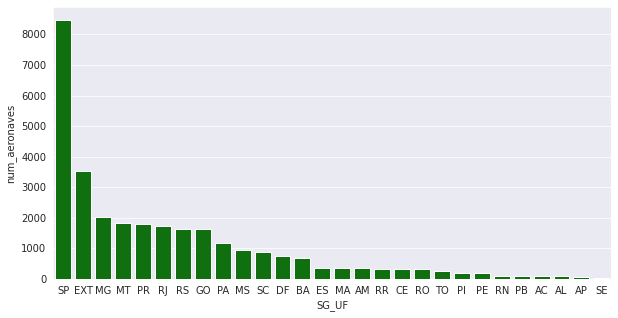

In [0]:

fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(data=teste, x='SG_UF', y='num_aeronaves', ax=ax, color='green');

In [0]:
# Este codigo mostra os fabricantes de aeronaves no mundo ordenados por maior quantidade de unidades de avioes fabricados
(
    df
    .query('NM_FABRICANTE != "null"')
    .groupby('NM_FABRICANTE')
    .agg(fab_aeronaves = ('NM_FABRICANTE', 'count'))
    
    .query('fab_aeronaves > 100')
    .sort_values('fab_aeronaves', ascending=False)
)

In [0]:
fabricantes

,NM_FABRICANTE,fab_aeronaves
425,CESSNA AIRCRAFT,4533
1667,NEIVA,2597
665,EMBRAER,2194
1816,PIPER AIRCRAFT,1912
313,BEECH AIRCRAFT,1479
1942,ROBINSON HELICOPTER,964
331,BOEING COMPANY,749
95,AIR TRACTOR,684
316,BELL HELICOPTER,556
449,CIRRUS DESIGN,460


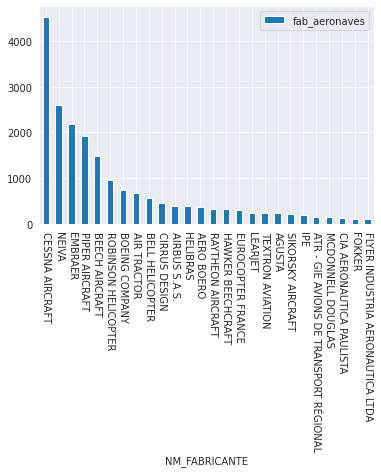

In [0]:
fabricantes.plot(kind='bar', x='NM_FABRICANTE', y='fab_aeronaves', rot=270);

Out[247]: <AxesSubplot:xlabel='fab_aeronaves', ylabel='NM_FABRICANTE'>

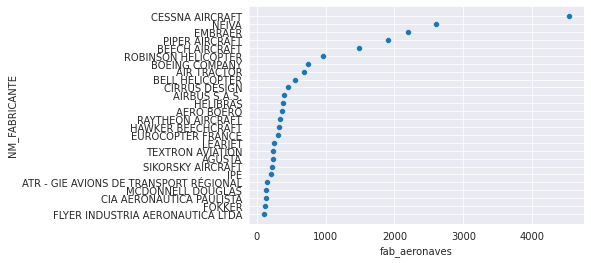

In [0]:
sns.scatterplot(x=fabricantes['fab_aeronaves'].astype(float), y=fabricantes['NM_FABRICANTE'])

In [0]:
#Este codigo mostra todos os fabricantes que fabricam ao menos 100 unidades de um modelo de aviao
(
    df
    .query('NM_FABRICANTE != "null"')
    .groupby(['NM_FABRICANTE', 'DS_MODELO'])
    .agg(fab_aeronaves = ('NM_FABRICANTE', 'count'))
    .reset_index()
    .query('fab_aeronaves > 100')
    .sort_values('NM_FABRICANTE', ascending=True)
    
)

,NM_FABRICANTE,DS_MODELO,fab_aeronaves
25,AERO BOERO,AB-115,310
184,AIR TRACTOR,AT-402B,147
187,AIR TRACTOR,AT-502B,306
221,AIRBUS S.A.S.,A320-214,102
545,BEECH AIRCRAFT,58,235
561,BEECH AIRCRAFT,95-B55,108
571,BEECH AIRCRAFT,A36,165
637,BELL HELICOPTER,206B,179
826,BOEING COMPANY,737-8EH,104
1011,CESSNA AIRCRAFT,152,250


In [0]:
#Este código mostra os 5 maiores proprietários de aeronaves no Brasil


top5_proprietarios =(
    df
    .query('CPF_CNPJ != "null" & CPF_CNPJ != "000.XXX.XXX-00" & CPF_CNPJ != "00.000.000/0000-00" ')
    .groupby('PROPRIETARIO')
    .agg(num_proprietarios = ('CPF_CNPJ', 'count'))
    .reset_index()
    .sort_values('num_proprietarios', ascending=False)
    .head(5)
    
)

top5_proprietarios

,PROPRIETARIO,num_proprietarios
5510,EMBRAER EMP.BRAS. DE AERONAUTICA S/A,410
7327,GOVERNO FEDERAL ANAC,229
7328,GOVERNO FEDERAL DAC,139
15978,TAM LINHAS AÉREAS S.A,96
2538,BANCO BRADESCO S.A,83
